<a href="https://colab.research.google.com/github/Venu2791/Deep-Vision/blob/master/Assignment%206/Assignment_6A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problem Statement:

Run the first network for 100 epochs and achieve a base accuracy.

Build a better architecure without using any special convolution techniques and beat the base accuracy. 


In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout,GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
!pip install -q utils 

Using TensorFlow backend.


##Loading dataset

Cifar10 has 10 different classes. Train data : 50000 and Test data : 10000.
Image Resolution :32X32



In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 2s 0us/step


Plot each class from CIFAR 10.
1. Create a list for classes in CIFAR10 dataset.
2. Create the subplot figure.
2. Iterate over each class and Pick a random image for each class from the train dataset.
3. Subplot all the classes of CIFAR10 with the appropriate label.

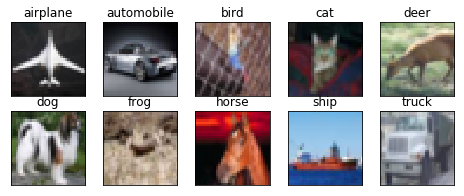

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

The below code is to plot the comparison of loss and accuracy betweeen train and test dataset taking model.fit as argument.

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

##Test Accuracy:
With the trained model, we do the predictions for the test dataset using predict function. We then compute the accuracy.

Accuracy= # of correct predictions/number of samples.

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

##Preprocessing data

1. Convert the image matrices to float and standardize (Dividing by 255) both train and test data. 
2. One-hot coding the train and test labels.


In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

##Base Model

Base model consists of 6 convolutions layers, 2 pooling layer and 2 layers. Run this mode for 100 epochs and fix the base accuracy.


In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)       

##Training the given model:

In the below code, we use DataGenerator objects to train the model in batches (batch_size=128) for 100 epochs.
We plot the accuracy and losses on the training and test sets after each epoch

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':





Epoch 1/100





390/390 [==============================] - 28s 71ms/step - loss: 1.8518 - acc: 0.2932 - val_loss: 1.4252 - val_acc: 0.4687
Epoch 2/100
390/390 [==============================] - 19s 49ms/step - loss: 1.3400 - acc: 0.5136 - val_loss: 1.0966 - val_acc: 0.6126
Epoch 3/100
390/390 [==============================] - 19s 49ms/step - loss: 1.1020 - acc: 0.6107 - val_loss: 0.9205 - val_acc: 0.6770
Epoch 4/100
390/390 [==============================] - 19s 49ms/step - loss: 0.9622 - acc: 0.6655 - val_loss: 0.8251 - val_acc: 0.7091
Epoch 5/100
390/390 [==============================] - 19s 49ms/step - loss: 0.8617 - acc: 0.7030 - val_loss: 0.7576 - val_acc: 0.7344
Epoch 6/100
390/390 [==============================] - 19s 49ms/step - loss: 0.7894 - acc: 0.7325 - val_loss: 0.7551 - val_acc: 0.7394
Epoch 7/100
390/390 [==============================] - 19s 49ms/step - loss: 0.7446 - acc: 0.7468 - val_loss: 0.7288 - val_acc: 0.7533
Epoch 8/100
390/390 [==========================

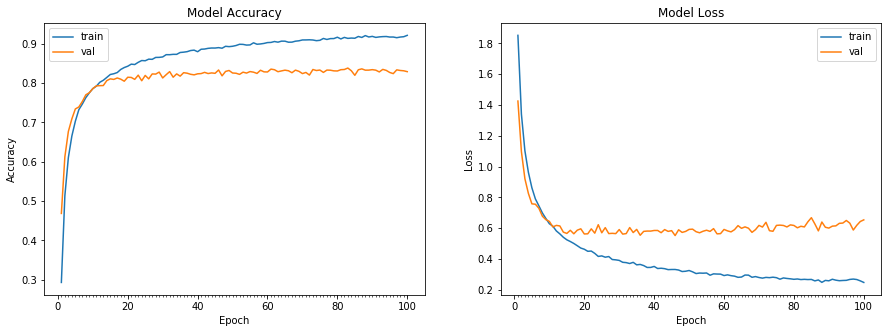

Accuracy on test data is: 82.92


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

##Improved Model

### Architecture of the model:

32X32X3    |  3X3X3X32         | 32X32X32    GRF-3  </br>
32X32X32   |  3X3X32X64        | 32X32X64    GRF-5  </br>
32X32X64   |  3X3X64X128       | 32X32X128   GRF-7</br>
32X32X128  | maxpooling(2,2)   | 16X16X128   GRF-8</br>
16X16X128  |  1X1X128X32       | 16X16X32    GRF-8</br> 
16X16X32   |  3X3X32X64        | 16X16X64    GRF-12</br>
16X16X64   |  3X3X64X128       | 16X16X128   GRF-16</br>
16X16X128  | maxpooling(2,2)   | 8X8X128     GRF-18</br>
8X8X128    |  1X1X128X32       | 8X8X32      GRF-18</br>
8X8X32     |  3X3X32X64        | 8X8X64      GRF-26</br>
8X8X64     |  8X8X64X10        | 8X8X10      GRF-34</br>
8X8X128    |  7X7X10X10        | 2X2X10      GRF-34</br>
2X2X10     |  GlobalAvgPooling | 1X1X10

In [0]:
# Define the model

#Convolution block

model = Sequential()
model.add(Convolution2D(32, 3, activation='relu', border_mode='same', input_shape=(32, 32, 3))) #GRF - 3
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(64, 3,3, border_mode='same',activation='relu'))#GRF -5 
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu')) #GRF -7
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2)))#GRF -8
model.add(Convolution2D(32, 1, activation='relu')) #GRF -8
model.add(Dropout(0.1))

model.add(Convolution2D(64, 3, 3, border_mode='same',activation='relu'))#GRF -12
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(128, 3, 3, border_mode='same',activation='relu'))#GRF -16
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2)))#GRF -18
model.add(Convolution2D(32, 1, activation='relu')) #GRF -18
model.add(Dropout(0.1))


model.add(Convolution2D(64, 3, 3, border_mode='same',activation='relu'))#GRF -26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, border_mode='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 7, 7))#GRF-34
#model.add(Convolution2D(10, 1, 1, border_mode='same',activation='relu'))

model.add(GlobalAveragePooling2D())

#model.add(Flatten())
model.summary()
model.add(Activation('softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, 3, activation="relu", input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", padding="same")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_7 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 128)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (7, 7))`


***Data Augumentation:***

We use certain techniques with data augumentation: Image Standardization, Normalization and Horizontal Flip.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  del sys.path[0]


Epoch 1/50


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


390/390 [==============================] - 50s 128ms/step - loss: 1.3869 - acc: 0.4963 - val_loss: 1.2665 - val_acc: 0.5667
Epoch 2/50
390/390 [==============================] - 46s 119ms/step - loss: 0.9667 - acc: 0.6562 - val_loss: 0.9279 - val_acc: 0.6733
Epoch 3/50
390/390 [==============================] - 46s 119ms/step - loss: 0.8159 - acc: 0.7095 - val_loss: 0.9476 - val_acc: 0.6709
Epoch 4/50
390/390 [==============================] - 46s 119ms/step - loss: 0.7334 - acc: 0.7403 - val_loss: 0.7498 - val_acc: 0.7377
Epoch 5/50
390/390 [==============================] - 46s 119ms/step - loss: 0.6696 - acc: 0.7662 - val_loss: 0.9663 - val_acc: 0.6720
Epoch 6/50
390/390 [==============================] - 46s 119ms/step - loss: 0.6392 - acc: 0.7784 - val_loss: 0.7178 - val_acc: 0.7574
Epoch 7/50
390/390 [==============================] - 46s 119ms/step - loss: 0.5970 - acc: 0.7902 - val_loss: 0.7335 - val_acc: 0.7500
Epoch 8/50
390/390 [==============================] - 46s 119ms/st

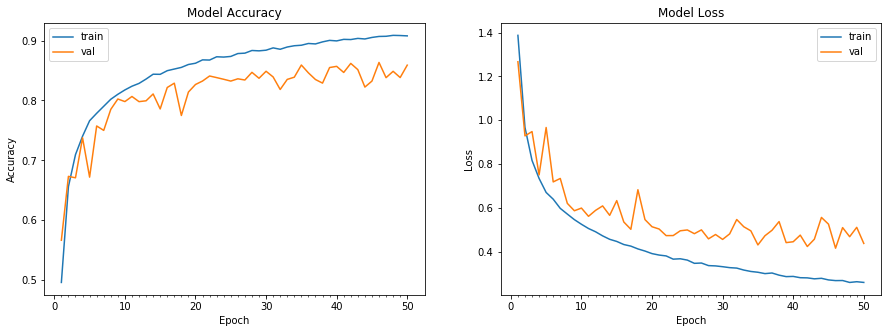

Accuracy on test data is: 85.89


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler


datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,horizontal_flip=True,zoom_range=0.0)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))